# Robustness¶

Many complex systems display a surprising degree of tolerance against errors. For example, relatively simple organisms grow, persist and reproduce despite drastic pharmaceutical or environmental interventions, an error tolerance attributed to the robustness of the underlying metabolic network1. Complex communication networks2 display a surprising degree of robustness: although key components regularly malfunction, local failures rarely lead to the loss of the global information-carrying ability of the network. The stability of these and other complex systems is often attributed to the redundant wiring of the functional web defined by the systems' components. Here we demonstrate that error tolerance is not shared by all redundant systems: it is displayed only by a class of inhomogeneously wired networks, called scale-free networks, which include the World-Wide Web, the Internet, social networks and cells. We find that such networks display an unexpected degree of robustness, the ability of their nodes to communicate being unaffected even by unrealistically high failure rates. However, error tolerance comes at a high price in that these networks are extremely vulnerable to attacks (that is, to the selection and removal of a few nodes that play a vital role in maintaining the network's connectivity). Such error tolerance and attack vulnerability are generic properties of communication networks

(Albert, R., Jeong, H. & Barabási, AL. Error and attack tolerance of complex networks. _Nature_ 406, 378–382 (2000). https://doi.org/10.1038/35019019)

## 1. Percolation

Create a regular grid to check the percolation properties. Generate a network in a 2d grid with nodes in positions $(x,y)$ with a probability $p$. Obtain the largest cluster also and plot them.


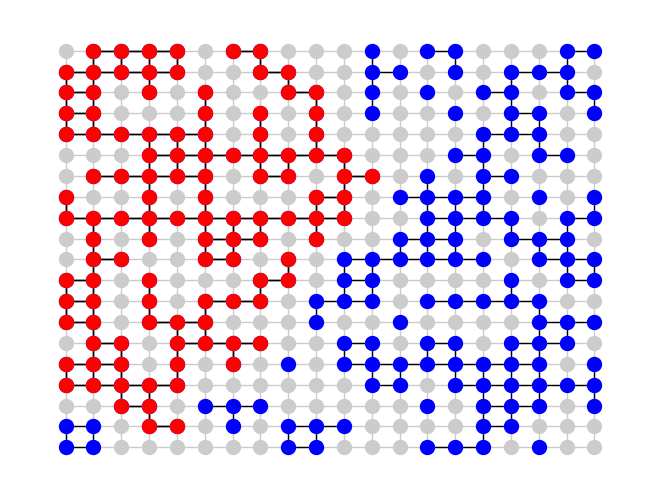

In [1]:
# generation of a 2d grid
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm



# shows the complete grid as reference
def background(n):
    G = nx.grid_2d_graph(n,n)
    pos = {(x,y):(y,-x) for x,y in G.nodes()}
    nx.draw(G, pos = pos,
        node_color=[[0.8, 0.8, 0.8]],
        edge_color=[[0.8, 0.8, 0.8]],
        node_size=100)


# identify largest connected component
def connected(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    nx.draw(G0, pos = pos,
        node_color='r', node_size=100)


n = 20
G = nx.grid_2d_graph(n,n)
pos = {(x,y):(y,-x) for x,y in G.nodes()}

# eliminate nodes for a (1-p) probability
# for example: if you want a p=0.1 of nodes, remnove 0.9
p = 0.595
n_to_remove = int(np.round(n*n * (1 - p)))
list_of_nodes = np.random.permutation(G.nodes())
list_of_nodes = list_of_nodes[0:n_to_remove,:]

# remove selected nodes from this type of graph
for node in list_of_nodes:
    G.remove_node(tuple(node))

fig = plt.figure()
background(n)
nx.draw(G, pos = pos,
        node_color='b', node_size=100)
connected(G)

Calculate the average size of the all the clusters $\langle s \rangle$ depending on the probability $p$
- generate grids with probs from 0 to 1
- obtain all the clusters
- calculate the average size
- plot them

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


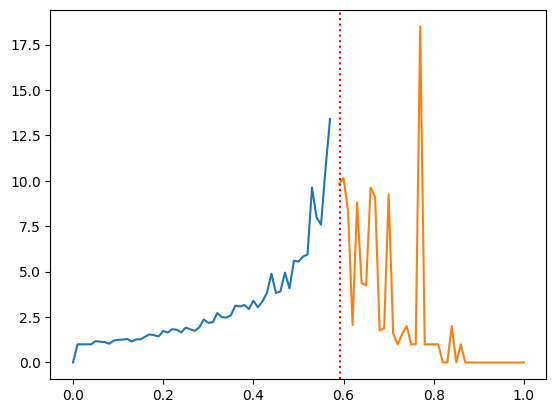

In [2]:
s = []
pinf = []
prob = np.linspace(0,1,101)
pc = 0.593
n = 20
G = nx.grid_2d_graph(n,n)
pos = {(x,y):(y,-x) for x,y in G.nodes()}

# to improve: repeat several times for the same prob and calculate the average value
for p in prob:
    # copy the complete grid
    Gp = G.copy()
    # remove the nodes
    n_to_remove = int(np.round(n*n * (1 - p)))
    list_of_nodes = np.random.permutation(Gp.nodes())
    list_of_nodes = list_of_nodes[0:n_to_remove,:]
    for node in list_of_nodes:
        Gp.remove_node(tuple(node))
    # obtain the cluster size
    comp_sizes = [len(c) for c in sorted(nx.connected_components(Gp), key=len, reverse=True)]
    # remove largest one in the second half
    start_at = 0 if p < pc else 1
    # add the mean cluster size
    s.append(np.mean(comp_sizes[start_at:]))
    # add the prob to belong to the largest cluster
    pinf.append(0 if len(comp_sizes) == 0 else comp_sizes[0] / Gp.number_of_nodes())

# replace nan by zero
s = [0 if np.isnan(i) else i for i in s]
plt.plot(prob[:58],s[:58])
plt.plot(prob[59:],s[59:])
plt.axvline(x=pc, color='red', linestyle='dotted')
plt.show()

And also the probability to belong to the largest cluester, $P_\infty$

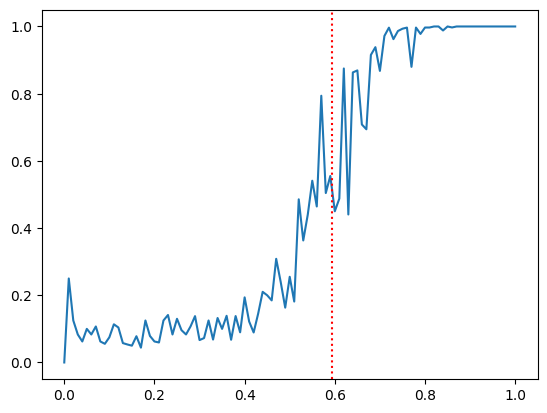

In [3]:
plt.plot(prob,pinf)
plt.axvline(x=pc, color='red', linestyle='dotted')
plt.show()

## 2. Robustness

Inverse percolation: remove nodes until disconnected. Plot the network in som intermediate steps

100%|██████████| 400/400 [00:00<00:00, 435.45it/s]


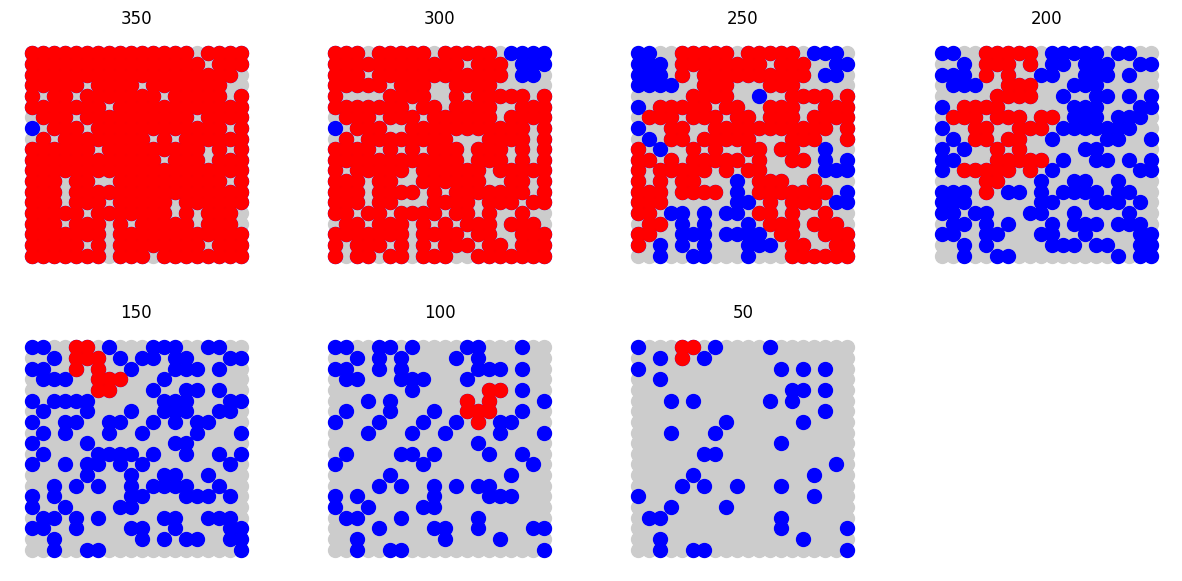

In [4]:
Grob = G.copy()
remove = np.random.permutation(Grob.nodes())

# remove_nodes_from() does not work directlñy with a 2d_grid
plt.figure(figsize=(15,7))
for i in tqdm(range(n*n)):
    # defines the steps until plot a graph
    rest = i % 50
    if rest == 0 and i > 0:
        plt.subplot(2,4,int(i / 50))
        # plot the background
        background(n)
        # plot the current graph
        nx.draw(Grob, pos = pos,
            node_color='b', node_size=100)
        # obtain and plot the connected components
        connected(Grob)
        plt.title(Grob.number_of_nodes())
    # removes one node
    Grob.remove_node(tuple(remove[i,:]))




## 2.1 Random failures
Calculate and plot how the efficiency of the graph decreases when random nodes are deleted
- use `global_efficiency()` function to calculate the efficiency of the graph
- remove nodes at random one by one and recalculate the efficiency each time (save the value on a list)
- normalize the efficiency dividing by the hisst one (first value over the complete graph)
- plot the evolucion of the efficiency

In [5]:
eff = []
# create a copy of the original graph to work with
Geff = G.copy()

# random order for deletion
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(n*n)):
    # calculate the global efficiency of the remaining graph
    eff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(tuple(remove[i,:]))



100%|██████████| 400/400 [00:32<00:00, 12.24it/s] 


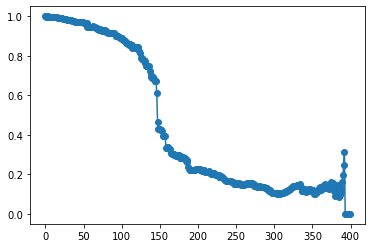

In [ ]:
plt.plot(np.array(eff) / eff[0], 'o-')
plt.show()

Calculate the efficiency of a random network and a barabasi-albert one. Plot the three values in the same graphic. Are there differences?

In [6]:
nnodes = G.number_of_nodes()

# random
Grand = nx.erdos_renyi_graph(nnodes, np.log(nnodes)/nnodes)
Reff = []
Geff = Grand.copy()
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(nnodes)):
    Reff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(remove[i])

# scale
Grand = nx.barabasi_albert_graph(nnodes,2)
SFeff = []
Geff = Grand.copy()
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(nnodes)):
    SFeff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(remove[i])



100%|██████████| 400/400 [00:14<00:00, 27.42it/s] 


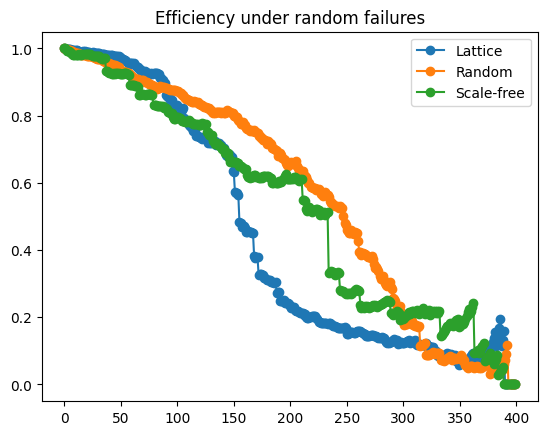

In [7]:
plt.plot(np.array(eff) / eff[0], 'o-', label='Lattice')
plt.plot(np.array(Reff) / Reff[0], 'o-', label='Random')
plt.plot(np.array(SFeff) / SFeff[0], 'o-', label='Scale-free')
plt.legend()
plt.title("Efficiency under random failures")
plt.show()

## 2.2. Deliberated attacks
Repeat the analysis but now remove the nodes with higher degree first. Solve randomly ties. Which are the differences with the random failures

In [8]:
# random
Grand = nx.erdos_renyi_graph(nnodes, np.log(nnodes)/nnodes)
Reff = []
Geff = Grand.copy()
remove = np.random.permutation(Geff.nodes())
for i in tqdm(range(nnodes)):
    remove = [node for (node, val) in sorted(Geff.degree(), key=lambda pair: pair[0])]
    Reff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(remove[0])

# scale
Grand = nx.barabasi_albert_graph(nnodes,2)
SFeff = []
Geff = Grand.copy()
for i in tqdm(range(nnodes)):
    remove = [node for (node, val) in sorted(Geff.degree(), key=lambda pair: pair[0])]
    SFeff.append(nx.global_efficiency(Geff))
    # remove the next random node
    Geff.remove_node(remove.pop(0))




100%|██████████| 400/400 [00:08<00:00, 45.84it/s] 


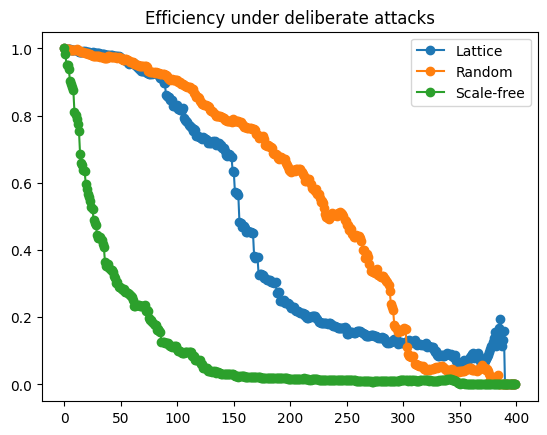

In [9]:
plt.plot(np.array(eff) / eff[0], 'o-', label='Lattice')
plt.plot(np.array(Reff) / Reff[0], 'o-', label='Random')
plt.plot(np.array(SFeff) / SFeff[0], 'o-', label='Scale-free')
plt.legend()
plt.title("Efficiency under deliberate attacks")
plt.show()

## 4. Cascades

Cascade failure is a critical phenomenon in networks. Node failure is not independent and is affected by the state of its neighbors.

To simulate a cascade, choose a random netowrk and marked it as damaged. In each step, all nodes with a determined proportion of damaged neighbors are alse damaged. Colour damaged nodes in red. Plot the total number of damaged nodes in each step.

Repeat it with different initial nodes, different proportion of damaged neighbors, and compare random and scale-free networks. Try to obtain samples
- critical $\langle k \rangle = 1$
- subcritical $\langle k \rangle < 1$
- supercritical $\langle k \rangle > 1$


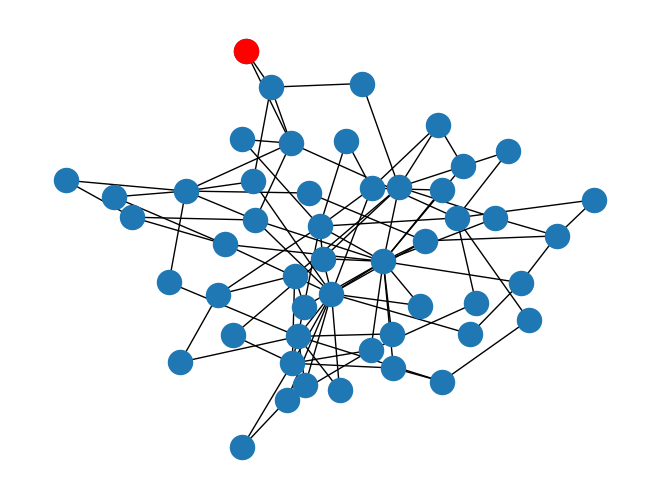

In [ ]:
# your code here
n = 50
G = nx.barabasi_albert_graph(n,2)
pos = nx.spring_layout(G)
nx.draw(G,pos=pos)

# one damaged node
damaged = [np.random.randint(n)]
nx.draw_networkx_nodes(G.subgraph(damaged),pos=pos,node_color='red')
plt.show()

# sugerence: use damaged to keep the old damaged nodes and a 'frontier' for the lastly added ones


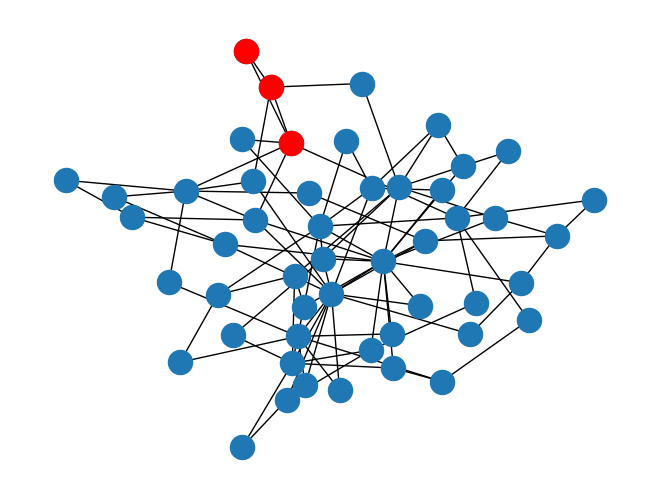

In [ ]:
frontier = nx.all_neighbors(G, damaged[0])
for node in frontier:
    damaged.append(node)
nx.draw(G,pos=pos)
nx.draw_networkx_nodes(G.subgraph(damaged),pos=pos,node_color='red')
